# SDS322E FINAL PROJECT - EXPLORATORY 

In [1]:
!pip install seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("../data/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

You are using pip version 19.0, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##### Step 1: Clean data

In [2]:
#Remove NA
df.isnull().sum()
#Remove noise - by rounding numbers 
df[['Age','FAF', 'FCVC', 'TUE', 'CH2O', 'NCP']] = round(df[['Age','FAF', 'FCVC', 'TUE', 'CH2O', 'NCP']],0)

##### Step 2: Describe data 

In [3]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.586058,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.357078,0.093305,26.191172,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.473343,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### Step 3: Find correlation 

<AxesSubplot:>

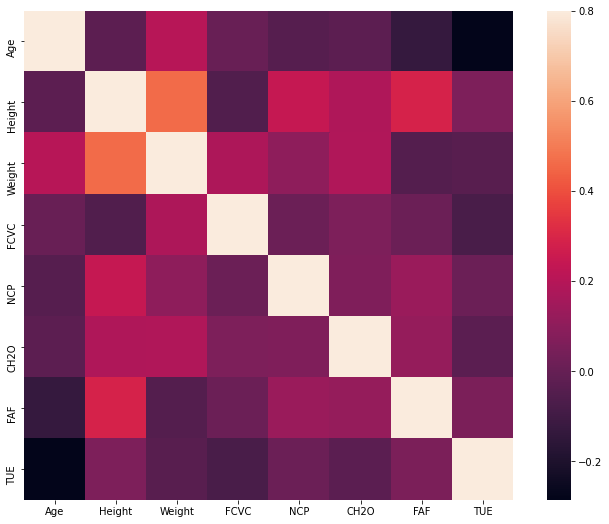

In [4]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

# SDS322E FINAL PROJECT - ANALYSIS

In [5]:
df['BMI'] = df['Weight']/(df['Height']**2)
import statsmodels.formula.api as smf
df1.head()

NameError: name 'df1' is not defined

### BMI vs. Family History 

In [ ]:
lm = lm = smf.ols('BMI ~ C(family_history_with_overweight)', data = df).fit()
lm.summary() 

### BMI vs. Frequency consumption of high-calories food

In [ ]:
lm = lm = smf.ols('BMI ~ C(FAVC)', data = df).fit()
lm.summary()

### BMI VS. Frequency of physical activities 

In [ ]:
lm = lm = smf.ols('BMI ~ C(FAF)', data = df).fit()
lm.summary()

### Added other variables 

In [6]:
lm = lm = smf.ols('BMI ~ C(family_history_with_overweight) + C(FAVC) + C(FAF)', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     159.4
Date:                Mon, 22 Nov 2021   Prob (F-statistic):          5.85e-144
Time:                        21:20:22   Log-Likelihood:                -7048.6
No. Observations:                2111   AIC:                         1.411e+04
Df Residuals:                    2105   BIC:                         1.414e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   20.1732      0.551     36.628      0.000      19.093      21.253
C(family_history_with_overweight)[T.yes]     9.2656      0.394     23.515      0.000       8.493      10.038
C(FAVC)[T.yes]                               3.4552      0.477      7.243      0.000       2.520       4.391
C(FAF)[T.1.0]                               -1.0223      0.354     -2.891      0.004      -1.716      -0.329
C(FAF)[T.2.0]                               -2.0528      0.399     -5.141      0.000      -2.836      -1.270
C(FAF)[T.3.0]                               -4.3431      0.680     -6.384      0.000      -5.677      -3.009
==============================================================================
Omnibus:                        9.340   Durbin-Watson:                   0.544
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                7.131
Skew:                          -0.005   Prob(JB):                       0.0283
Kurtosis:                       2.715   Cond. No.                         8.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## -------TEST MODEL STARTS HERE!!! -------

##### Change categorical variables into numerical variables 

In [7]:
df['Gender']=df['Gender'].apply(lambda x:1 if x == 'yes' else 0)
df['family_history_with_overweight']=df['family_history_with_overweight'].apply(lambda x:1 if x == 'yes' else 0)
df['FAVC']=df['FAVC'].apply(lambda x:1 if x == 'yes' else 0)
df['SMOKE']=df['SMOKE'].apply(lambda x:1 if x == 'yes' else 0)
df['SCC']=df['SCC'].apply(lambda x:1 if x == 'yes' else 0)
df['CAEC'] = pd.factorize(df['CAEC'])[0]
df['CALC'] = pd.factorize(df['CALC'])[0]
df['MTRANS'] = pd.factorize(df['MTRANS'])[0]

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,0,Normal_Weight,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,1,0,Normal_Weight,24.238227
2,0,23.0,1.80,77.0,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,2,0,Normal_Weight,23.765432
3,0,27.0,1.80,87.0,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,1,Overweight_Level_I,26.851852
4,0,22.0,1.78,89.8,0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1,0,Overweight_Level_II,28.342381


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

In [9]:
# define data, X is the independent variables, Y is the dependent variable 
df1 = df.drop(['Height','Weight','NObeyesdad','BMI'],axis=1)
x_raw = np.array(df1)
Y = np.array(df['BMI'])

# specify a linear model
reg = linear_model.LinearRegression()

# fit a linear model to data
reg.fit(x_raw, Y)

# print out the fitted slops
reg.coef_, reg.intercept_


(array([ 0.        ,  0.30398466,  7.22629046,  2.68412759,  2.57709184,
         0.2008731 , -2.12338182, -1.00403934,  0.92650302, -2.18655694,
        -0.80300961, -0.45409741,  2.08668234, -2.06856573]),
 6.593896335530289)

In [10]:
#Split the trainning sets 
X_train, X_test, y_train, y_test = train_test_split(x_raw, Y, random_state=1, test_size=0.3)

#Train, test, and get the accuracy score 
reg.fit(X_train, y_train)
reg.predict(X_test) 
reg.score(X_test, y_test)

0.40406162632069886

## LINEAR REGRESSION 

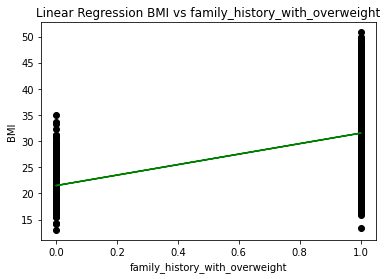

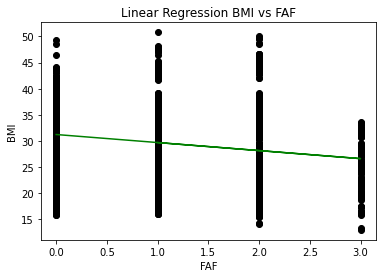

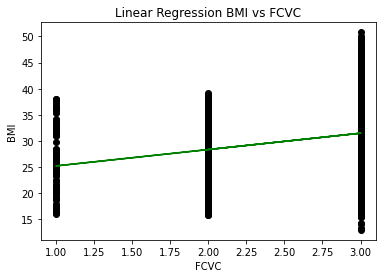

In [11]:
df_picked = df[['family_history_with_overweight','FAF','FCVC']]
for (columnName, columnData) in df_picked.iteritems():
    x_raw = columnData.values
    #Return 2D 
    X = x_raw.reshape(-1, 1)
    #Fit line
    lin = reg.fit(X,Y)
    #Plot 
    plt.scatter(X, Y , color='k')
    plt.plot(X, lin.predict(X),color='g')
    plt.title("Linear Regression BMI vs " + columnName)
    plt.xlabel(columnName)
    plt.ylabel("BMI")
    plt.show()

#import seaborn as sns
#sns.set_theme(style="darkgrid")

#tips = sns.load_dataset("tips")
#g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  #kind="reg", truncate=False,
                  #xlim=(0, 60), ylim=(0, 12),
                  #color="m", height=7)

## LOGISTIC REGRESSION 

In [12]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,0,Normal_Weight,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,1,0,Normal_Weight,24.238227
2,0,23.0,1.80,77.0,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,2,0,Normal_Weight,23.765432
3,0,27.0,1.80,87.0,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,1,Overweight_Level_I,26.851852
4,0,22.0,1.78,89.8,0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1,0,Overweight_Level_II,28.342381


In [13]:
from sklearn.linear_model import LogisticRegression 

# Factorize categorical variable
df['NObeyesdad'] = pd.factorize(df['NObeyesdad'])[0]

# Declare Y for Logistic Regression 
Y1 = np.array(df['NObeyesdad'])
X = x_raw.reshape(-1, 1)

#Split the trainning sets 
X_train, X_test, y_train, y_test = train_test_split(X, Y1, random_state=1, test_size=0.3)

# Train, test, and get accuracy score 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logmodel.predict(X_test)
logmodel.score(X_test, y_test)

0.27917981072555204

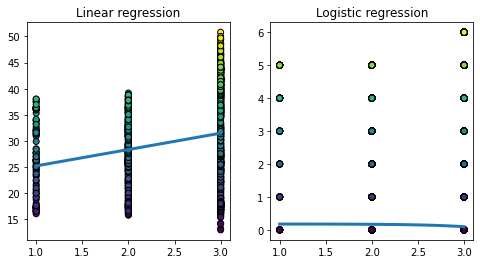

In [14]:
import matplotlib.pylab as plt

# Specify the range of X for which we want to make prediction (dummay variable X)
Xlin = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]


figure = plt.figure(figsize=(8, 4))

ax = plt.subplot(1,2,1)
plt.title('Linear regression')

# make a scatter plot (show the actual data)
ax.scatter(X, Y, c=Y, edgecolors='k')

# make prediction for new data points, using the fitted linear relation
ylin = reg.predict(Xlin)
plt.plot(Xlin, ylin, linewidth=3) # plot the fitted model


ax = plt.subplot(1,2,2)
plt.title('Logistic regression')

# make a scatter plot (show the actual data)
ax.scatter(X, Y1, c=Y1, edgecolors='k')

# make prediction for new data points, using the fitted logistic function
ylin = logmodel.predict_proba(Xlin)[:,1]
plt.plot(Xlin, ylin, linewidth=3) # plot the fitted model

In [15]:
y_reg_pred = reg.predict(X)
y_logmodel_pred  = logmodel.predict_proba(X)[:,1]


mse_reg = np.mean((Y - y_reg_pred)**2)
mse_logmodel =  np.mean((Y1 - y_logmodel_pred)**2)

print("Linear Model MSE = ", mse_reg)
print("Logistic Regression MSE = ", mse_logmodel)

Linear Model MSE =  60.81252933821659
Logistic Regression MSE =  12.527986457617663
